In [2]:
#importing numpy
import numpy as np

# importing matplotlib to perform figures
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [3]:

list_temp=[]
list_PC=[]
list_PE=[]
counter=0
file = open('RMN_31P_fit_25perc_TAG.csv', "r")

for line in file.readlines():

    if counter > 0:
        line_values = line.split()
        values = [float(x) for x in line_values]
        list_temp.append(int(values[0]))
        list_PC.append(values[1])
        list_PE.append(values[2])        
    counter=counter+1


/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[3.29541548e+02 4.39086786e-02 1.16703672e+02]
[233.36451168  -0.48737902  70.90952381]


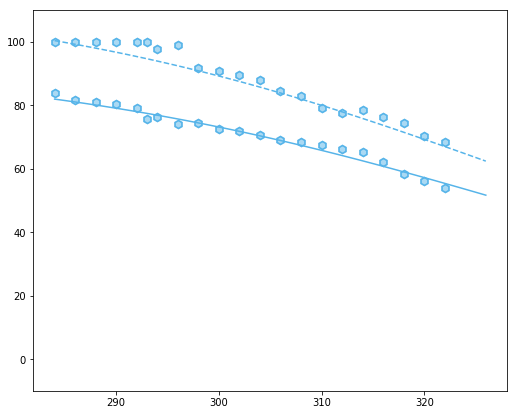

In [4]:
xdata = np.linspace(284, 326, 100)

def sigmoid(x, xo,k, A):
    y = A-A/(1+ np.exp(-k*(x-xo)))
    return y

p_start1=[284,0.3,120]
p_start2=[284,0.3,80]

list_err=[5] * len(list_temp)

popt1, pcov1 = curve_fit(sigmoid, list_temp, list_PC, p0=p_start1, sigma=list_err)
popt2, pcov2 = curve_fit(sigmoid, list_temp, list_PE, p0=p_start2, sigma=list_err)


print popt1
print popt2

fig = plt.figure(figsize=(8.5, 7))
ax = fig.add_subplot(111)

#ax.plot(xdata, sigmoid(xdata, *popt1), "--", color='#56b4e9')
ax.plot(xdata, sigmoid(xdata, *[329.5,0.04,116.7]), "--", color='#56b4e9')
ax.plot(list_temp, list_PC,'h', markersize=8, mew='1.5', color='#56b4e9',alpha=0.5)
ax.plot(list_temp, list_PC,'h', markersize=8, mfc='none', mew='1.5', color='#56b4e9')


#ax.plot(xdata, sigmoid(xdata, *popt2), "-", color='#009e73')
ax.plot(xdata, sigmoid(xdata, *[330.6,0.04,94.7]), "-", color='#56b4e9')
ax.plot(list_temp, list_PE,'h', markersize=8, mew='1.5', color='#56b4e9',alpha=0.5)
ax.plot(list_temp, list_PE,'h', markersize=8, mfc='none', mew='1.5', color='#56b4e9')


plt.ylim(-10,110)

fig.savefig("TAG25_fit.svg", dpi=200)